<a href="https://colab.research.google.com/github/aliya-fatma011/Machine-Learning/blob/main/kmeans_cluster_v_s_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Point | x  | y  |               |
| ----- | -- | -- | ------------- |
| A     | 1  | 2  |               |
| B     | 2  | 2  |               |
| C     | 2  | 3  |               |
| D     | 8  | 8  |               |
| E     | 8  | 9  |               |
| F     | 25 | 30 | ← **Outlier** |




:K-Means on this data (K = 2)
Step 1: Choose K = 2

Initial centroids (random):

C₁ = (1,2)

C₂ = (8,8)

Step 2: Assign points (Euclidean distance)

Cluster 1 → A, B, C

Cluster 2 → D, E and F

⚠️ Problem:
Point F (25,30) is an outlier but K-Means forces it into a cluster, pulling the centroid away.

Result:

Centroid shifts incorrectly

Cluster quality degrades

❌ Outliers not detected

✅ DBSCAN on same data

✅ DBSCAN on same data

Choose parameters:

ε (epsilon) = 2

MinPts = 2

Density check:

A, B, C → dense → Cluster 1

D, E → dense → Cluster 2

F → isolated → marked as NOISE

Result:

✔ Correct clusters
✔ Outlier detected automatically
✔ No need to specify K

K-means code

In [1]:
import numpy as np
from sklearn.cluster import KMeans

# Data
X = np.array([
    [1,2], [2,2], [2,3],
    [8,8], [8,9],
    [25,30]  # outlier
])

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

print("Cluster Labels:", kmeans.labels_)
print("Centroids:\n", kmeans.cluster_centers_)


Cluster Labels: [0 0 0 0 0 1]
Centroids:
 [[ 4.2  4.8]
 [25.  30. ]]


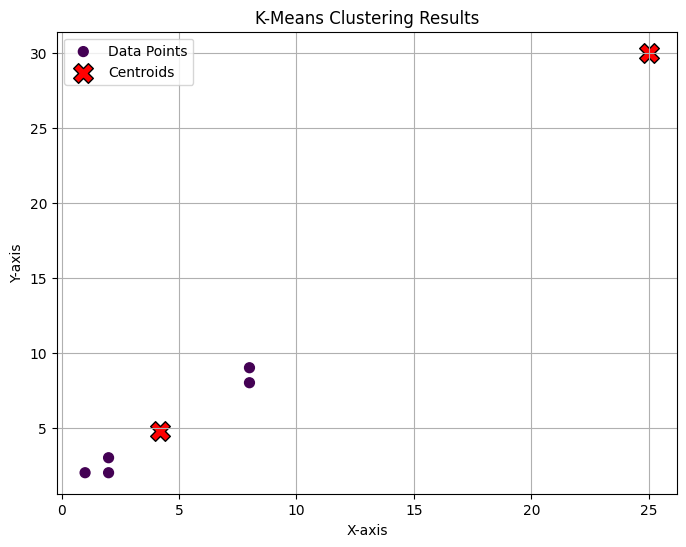

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot data points, colored by cluster labels
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, label='Data Points')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, c='red', edgecolor='black', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

DBSCAN Code

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np

X = np.array([
    [1,2], [2,2], [2,3],
    [8,8], [8,9],
    [25,30]  # outlier
])

dbscan = DBSCAN(eps=2, min_samples=2)
labels = dbscan.fit_predict(X)

print("DBSCAN Labels:", labels)


DBSCAN Labels: [ 0  0  0  1  1 -1]


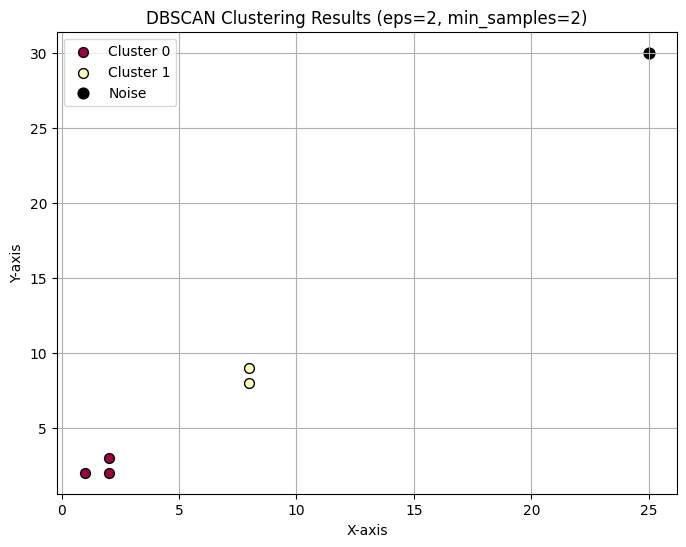

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Get unique labels
unique_labels = set(labels)

# Colors for clusters (excluding noise which will be black)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot data points
for k, col in zip(unique_labels, colors):
    if k == -1: # Noise points
        col = [0, 0, 0, 1] # Black color for noise
        marker_size = 60
        label_text = 'Noise'
    else:
        marker_size = 50
        label_text = f'Cluster {k}'

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=marker_size, label=label_text, edgecolor='black')

plt.title('DBSCAN Clustering Results (eps=2, min_samples=2)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()